In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [59]:
file_path = '/Users/zlatastefanovic/Desktop/Internship/BubblesDataset.xlsx'
data = pd.read_excel(file_path)

In [60]:
data.head(10)

,Type of bubble,Pressure (bar),KPi electrolyte concentration (M),Current density (mA/cm2),Number of bubbles (-),Stdev of Number of bubbles (-),Diameter of bubbles (mm),Stdev of Diameter of bubbles (mm),Optical loss (%),Stdev of Optical loss (%)
0,H2,1,2.0,1.25,75.33333,7.76745,0.12902,0.018350,9.43813,0.10639
1,H2,1,2.0,1.88,309.66667,34.67468,0.08179,0.005280,9.68566,0.59569
2,H2,1,2.0,2.50,1392.33333,105.26316,0.05580,0.001530,20.19409,0.32155
3,H2,2,2.0,1.25,114.00000,14.73092,0.08567,0.005810,2.11139,0.25412
4,H2,2,2.0,1.88,353.33333,37.81975,0.06716,0.008110,5.58500,0.55303
5,H2,2,2.0,2.50,1335.33333,155.80864,0.05298,0.000312,14.95072,1.51389
6,H2,3,2.0,1.25,144.66667,5.13160,0.06536,0.001430,1.69799,0.27772
7,H2,3,2.0,1.88,403.33333,40.50103,0.06483,0.004680,3.45628,0.32227
8,H2,3,2.0,2.50,1395.66667,259.58493,0.04620,0.002810,11.11406,0.82879
9,H2,4,2.0,1.25,195.00000,8.71780,0.05852,0.002500,0.80766,0.39784


In [61]:
O2data = data[data['Type of bubble'] == 'O2']
H2data = data[data['Type of bubble'] == 'H2']

In [62]:
data = pd.get_dummies(data)

In [63]:
data.head(10)

,Pressure (bar),KPi electrolyte concentration (M),Current density (mA/cm2),Number of bubbles (-),Stdev of Number of bubbles (-),Diameter of bubbles (mm),Stdev of Diameter of bubbles (mm),Optical loss (%),Stdev of Optical loss (%),Type of bubble_H2,Type of bubble_O2
0,1,2.0,1.25,75.33333,7.76745,0.12902,0.018350,9.43813,0.10639,True,False
1,1,2.0,1.88,309.66667,34.67468,0.08179,0.005280,9.68566,0.59569,True,False
2,1,2.0,2.50,1392.33333,105.26316,0.05580,0.001530,20.19409,0.32155,True,False
3,2,2.0,1.25,114.00000,14.73092,0.08567,0.005810,2.11139,0.25412,True,False
4,2,2.0,1.88,353.33333,37.81975,0.06716,0.008110,5.58500,0.55303,True,False
5,2,2.0,2.50,1335.33333,155.80864,0.05298,0.000312,14.95072,1.51389,True,False
6,3,2.0,1.25,144.66667,5.13160,0.06536,0.001430,1.69799,0.27772,True,False
7,3,2.0,1.88,403.33333,40.50103,0.06483,0.004680,3.45628,0.32227,True,False
8,3,2.0,2.50,1395.66667,259.58493,0.04620,0.002810,11.11406,0.82879,True,False
9,4,2.0,1.25,195.00000,8.71780,0.05852,0.002500,0.80766,0.39784,True,False


In [64]:
H2data.head(10)

,Type of bubble,Pressure (bar),KPi electrolyte concentration (M),Current density (mA/cm2),Number of bubbles (-),Stdev of Number of bubbles (-),Diameter of bubbles (mm),Stdev of Diameter of bubbles (mm),Optical loss (%),Stdev of Optical loss (%)
0,H2,1,2.0,1.25,75.33333,7.76745,0.12902,0.018350,9.43813,0.10639
1,H2,1,2.0,1.88,309.66667,34.67468,0.08179,0.005280,9.68566,0.59569
2,H2,1,2.0,2.50,1392.33333,105.26316,0.05580,0.001530,20.19409,0.32155
3,H2,2,2.0,1.25,114.00000,14.73092,0.08567,0.005810,2.11139,0.25412
4,H2,2,2.0,1.88,353.33333,37.81975,0.06716,0.008110,5.58500,0.55303
5,H2,2,2.0,2.50,1335.33333,155.80864,0.05298,0.000312,14.95072,1.51389
6,H2,3,2.0,1.25,144.66667,5.13160,0.06536,0.001430,1.69799,0.27772
7,H2,3,2.0,1.88,403.33333,40.50103,0.06483,0.004680,3.45628,0.32227
8,H2,3,2.0,2.50,1395.66667,259.58493,0.04620,0.002810,11.11406,0.82879
9,H2,4,2.0,1.25,195.00000,8.71780,0.05852,0.002500,0.80766,0.39784


In [94]:
x = data.drop(['Optical loss (%)', 'Stdev of Number of bubbles (-)','Stdev of Diameter of bubbles (mm)',
               'Stdev of Optical loss (%)'], axis = 1)

xH2 = H2data.drop(['Optical loss (%)', 'Stdev of Number of bubbles (-)','Stdev of Diameter of bubbles (mm)',
               'Stdev of Optical loss (%)', 'Type of bubble', 'Number of bubbles (-)', 'Diameter of bubbles (mm)'], axis = 1)
xO2 = O2data.drop(['Optical loss (%)', 'Stdev of Number of bubbles (-)','Stdev of Diameter of bubbles (mm)',
               'Stdev of Optical loss (%)', 'Type of bubble', 'Number of bubbles (-)', 'Diameter of bubbles (mm)'], axis = 1)

In [95]:
x.head(10)

,Pressure (bar),KPi electrolyte concentration (M),Current density (mA/cm2),Number of bubbles (-),Diameter of bubbles (mm),Type of bubble_H2,Type of bubble_O2
0,1,2.0,1.25,75.33333,0.12902,True,False
1,1,2.0,1.88,309.66667,0.08179,True,False
2,1,2.0,2.50,1392.33333,0.05580,True,False
3,2,2.0,1.25,114.00000,0.08567,True,False
4,2,2.0,1.88,353.33333,0.06716,True,False
5,2,2.0,2.50,1335.33333,0.05298,True,False
6,3,2.0,1.25,144.66667,0.06536,True,False
7,3,2.0,1.88,403.33333,0.06483,True,False
8,3,2.0,2.50,1395.66667,0.04620,True,False
9,4,2.0,1.25,195.00000,0.05852,True,False


In [96]:
xH2.head(10)

,Pressure (bar),KPi electrolyte concentration (M),Current density (mA/cm2)
0,1,2.0,1.25
1,1,2.0,1.88
2,1,2.0,2.50
3,2,2.0,1.25
4,2,2.0,1.88
5,2,2.0,2.50
6,3,2.0,1.25
7,3,2.0,1.88
8,3,2.0,2.50
9,4,2.0,1.25


In [134]:
yH2 = H2data['Number of bubbles (-)']
yO2 = O2data['Number of bubbles (-)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 19)
xH2_train,xH2_test,yH2_train,yH2_test = train_test_split(xH2,yH2,test_size = 0.2, random_state = 19)
xO2_train,xO2_test,yO2_train,yO2_test = train_test_split(xO2,yO2,test_size = 0.2, random_state = 19)

rfrH2 = RandomForestRegressor(random_state=13)
rfrO2 = RandomForestRegressor(random_state=13)

rfrH2.fit(xH2_train,yH2_train)
rfrO2.fit(xO2_train,yO2_train)

yH2_pred = rfrH2.predict(xH2_test)
yO2_pred = rfrO2.predict(xO2_test)

print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))

print('~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~')

param_grid = {
    'n_estimators': [50,100,200,300,400],
    'max_depth':[10,20,30,40],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4,5]
}
rfr_cvH2 = GridSearchCV(estimator = rfrH2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfr_cvO2 = GridSearchCV(estimator = rfrO2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

rfr_cvH2.fit(xH2_train,yH2_train)
rfr_cvO2.fit(xO2_train,yO2_train)

yH2_pred = rfr_cvH2.predict(xH2_test)
yO2_pred = rfr_cvO2.predict(xO2_test)

print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))


Mean absolute errors:
92.75250030000022
34.950833237499964
Mean squared errors:
17356.2424817664
2616.7335176350525
R2 scores:
0.8898866354038637
0.9336003556105182
~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~


/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean absolute errors:
86.81885452187521
29.877499975000006
Mean squared errors:
15606.014185550071
1972.167167791672
R2 scores:
0.9013469816452317
0.9508752216575536


/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [135]:
importances = rfrH2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xH2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

importances = rfrO2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xO2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                             Feature  Importance
1  KPi electrolyte concentration (M)    0.625279
2           Current density (mA/cm2)    0.361487
0                     Pressure (bar)    0.013234
                             Feature  Importance
1  KPi electrolyte concentration (M)    0.865988
2           Current density (mA/cm2)    0.118736
0                     Pressure (bar)    0.015275


In [129]:
yH2 = H2data['Diameter of bubbles (mm)']
yO2 = O2data['Diameter of bubbles (mm)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 19)
xH2_train,xH2_test,yH2_train,yH2_test = train_test_split(xH2,yH2,test_size = 0.2, random_state = 19)
xO2_train,xO2_test,yO2_train,yO2_test = train_test_split(xO2,yO2,test_size = 0.2, random_state = 19)

rfrH2 = RandomForestRegressor(random_state=13)
rfrO2 = RandomForestRegressor(random_state=13)

rfrH2.fit(xH2_train,yH2_train)
rfrO2.fit(xO2_train,yO2_train)

yH2_pred = rfrH2.predict(xH2_test)
yO2_pred = rfrO2.predict(xO2_test)

print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))

param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth':[10,20,30,40],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4,5]
}
rfr_cvH2 = GridSearchCV(estimator = rfrH2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfr_cvO2 = GridSearchCV(estimator = rfrO2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

rfr_cvH2.fit(xH2_train,yH2_train)
rfr_cvO2.fit(xO2_train,yO2_train)

yH2_pred = rfr_cvH2.predict(xH2_test)
yO2_pred = rfr_cvO2.predict(xO2_test)
                           
print('~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~')
print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))


Mean absolute errors:
0.02145467500000002
0.008678325000000013
Mean squared errors:
0.001019795873232503
0.00010368546984999971
R2 scores:
0.2388723914788896
0.9847208442421543
~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~
Mean absolute errors:
0.022734099999999695
0.008678325000000013
Mean squared errors:
0.0010814169540218832
0.00010368546984999971
R2 scores:
0.15819950464051136
0.9847208442421543


In [133]:
print('Importance for H2')
importances = rfrH2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xH2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
print()
print('Importance for O2')
importances = rfrO2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xO2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Importance for H2
                             Feature  Importance
1  KPi electrolyte concentration (M)    0.644858
0                     Pressure (bar)    0.285816
2           Current density (mA/cm2)    0.069326

Importance for O2
                             Feature  Importance
1  KPi electrolyte concentration (M)    0.931771
0                     Pressure (bar)    0.038479
2           Current density (mA/cm2)    0.029750


In [136]:
yH2 = H2data['Optical loss (%)']
yO2 = O2data['Optical loss (%)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 19)
xH2_train,xH2_test,yH2_train,yH2_test = train_test_split(xH2,yH2,test_size = 0.2, random_state = 19)
xO2_train,xO2_test,yO2_train,yO2_test = train_test_split(xO2,yO2,test_size = 0.2, random_state = 19)

rfrH2 = RandomForestRegressor(random_state=13)
rfrO2 = RandomForestRegressor(random_state=13)

rfrH2.fit(xH2_train,yH2_train)
rfrO2.fit(xO2_train,yO2_train)

yH2_pred = rfrH2.predict(xH2_test)
yO2_pred = rfrO2.predict(xO2_test)

print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))

param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth':[10,20,30,40],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4,5]
}
rfr_cvH2 = GridSearchCV(estimator = rfrH2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfr_cvO2 = GridSearchCV(estimator = rfrO2, param_grid = param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

rfr_cvH2.fit(xH2_train,yH2_train)
rfr_cvO2.fit(xO2_train,yO2_train)

yH2_pred = rfr_cvH2.predict(xH2_test)
yO2_pred = rfr_cvO2.predict(xO2_test)
                           
print('~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~')
print('Mean absolute errors:')
print(mean_absolute_error(yH2_pred,yH2_test))
print(mean_absolute_error(yO2_pred,yO2_test))

print('Mean squared errors:')
print(mean_squared_error(yH2_pred,yH2_test))
print(mean_squared_error(yO2_pred,yO2_test))

print('R2 scores:')
print(r2_score(yH2_pred,yH2_test))
print(r2_score(yO2_pred,yO2_test))


Mean absolute errors:
1.325529750000001
1.0021396250000025
Mean squared errors:
3.641653915618399
1.4279457591029567
R2 scores:
0.716533813464401
0.9169152886400548
~~~~~~~~~~~~~~~~~~~ Doing Grid Optimization ~~~~~~~~~~~~~~~~~
Mean absolute errors:
1.2453879187500072
1.0021396250000025
Mean squared errors:
3.287796091434807
1.4279457591029567
R2 scores:
0.7406123001894028
0.9169152886400548


/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [137]:
print('Importance for H2')
importances = rfrH2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xH2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
print()
print('Importance for O2')
importances = rfrO2.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': xO2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Importance for H2
                             Feature  Importance
1  KPi electrolyte concentration (M)    0.476238
0                     Pressure (bar)    0.270823
2           Current density (mA/cm2)    0.252938

Importance for O2
                             Feature  Importance
1  KPi electrolyte concentration (M)    0.434756
0                     Pressure (bar)    0.394541
2           Current density (mA/cm2)    0.170702


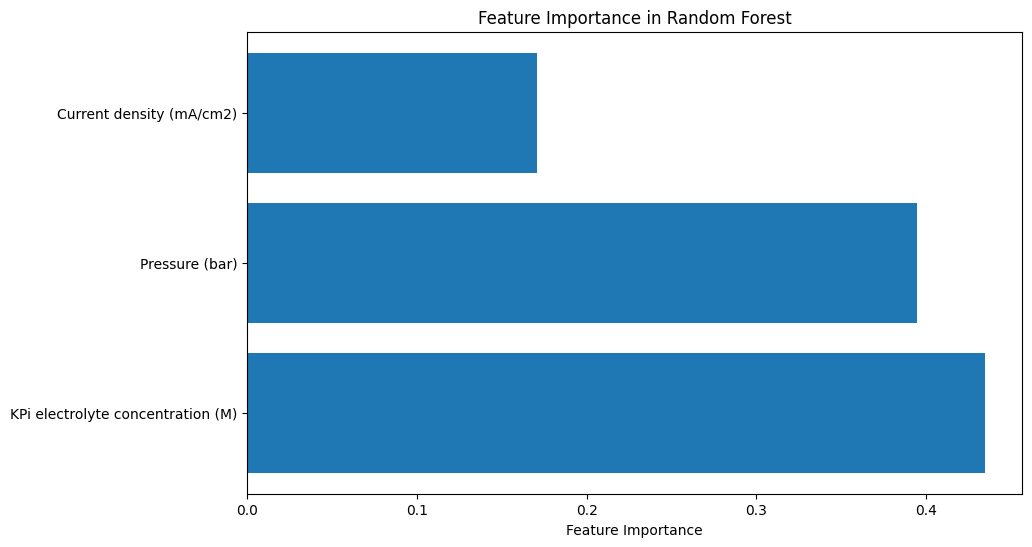

In [138]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()